<a href="https://colab.research.google.com/github/ulingga/Manchu-English_babyMT/blob/main/Dataset_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


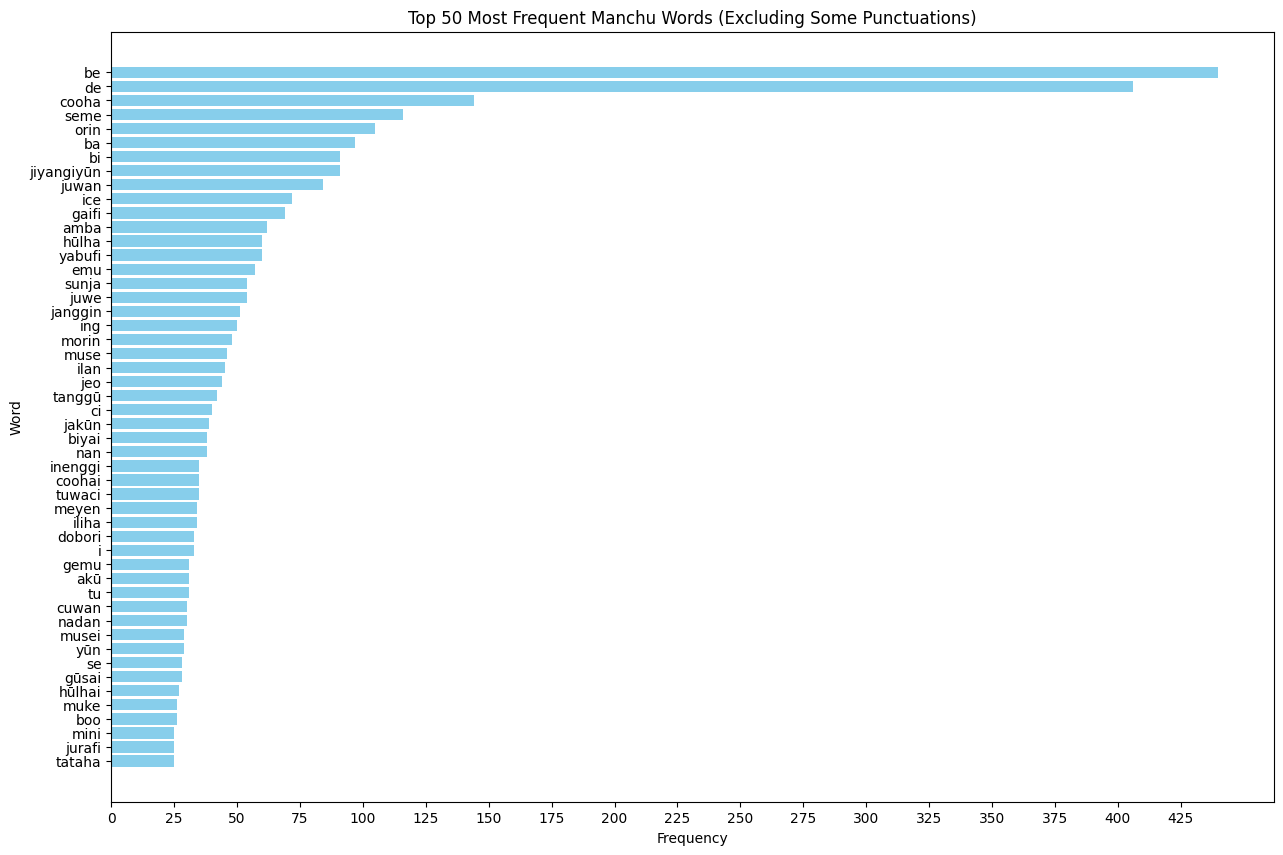

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


# Load data
url = 'https://raw.githubusercontent.com/ulingga/Manchu-English_babyMT/main/Manchu-English.csv'
df = pd.read_csv(url)

source_data = df['Manchu']
target_data = df['English']

combined_text = ' '.join(source_data)
tokens = word_tokenize(combined_text)

word_counts = Counter(tokens)
unique_words = list(word_counts.keys())
num_unique_words = len(unique_words)

# print(f"Each word's count: {word_counts}")

# Remove specific unwanted tokens (e.g., punctuation)
unwanted_tokens = ['.']  # Add more if needed
for unwanted_token in unwanted_tokens:
    word_counts.pop(unwanted_token, None)  # Remove the unwanted token if present

# Convert dictionary to a Pandas DataFrame
freq_df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by Frequency
freq_df = freq_df.sort_values('Frequency', ascending=False)

# For readability, you might want to plot only the top N most frequent words
top_n = 50
top_freq_df = freq_df.head(top_n)

# Create a bar plot
plt.figure(figsize=(15, 10))
plt.barh(top_freq_df['Word'], top_freq_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top {} Most Frequent Manchu Words (Excluding Some Punctuations)'.format(top_n))
max_freq = top_freq_df['Frequency'].max()  # get the maximum frequency value (for the upper limit of ticks)
plt.xticks(range(0, max_freq+1, 25))  # create ticks from 0 to max_freq by 50

plt.gca().invert_yaxis()
plt.show()




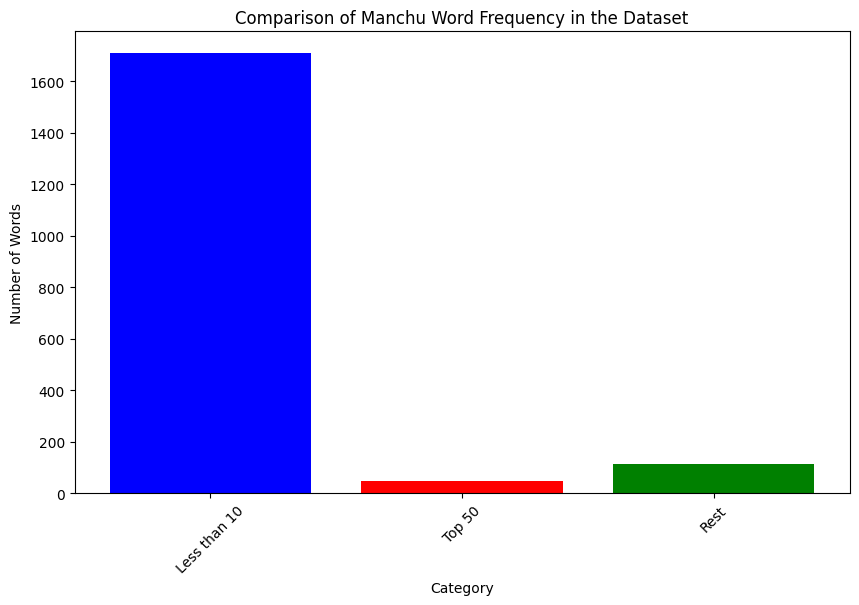

In [16]:
# Compare total word frequency

# Create categories
less_than_10 = freq_df[freq_df['Frequency'] < 10].shape[0]  # Count of words with less than 10 occurrences
top_50 = freq_df.head(50).shape[0]  # Count of words in the top 50 (should be 50)
rest = freq_df.shape[0] - less_than_10 - top_50  # Count of the rest of the words

# Create a DataFrame for the plot
plot_data = pd.DataFrame({
    'Category': ['Less than 10', 'Top 50', 'Rest'],
    'Number of Words': [less_than_10, top_50, rest]
})

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(plot_data['Category'], plot_data['Number of Words'], color=['blue', 'red', 'green'])
plt.xlabel('Category')
plt.ylabel('Number of Words')
plt.title('Comparison of Manchu Word Frequency in the Dataset')
plt.xticks(rotation=45)  # Rotate category labels for better readability

plt.show()

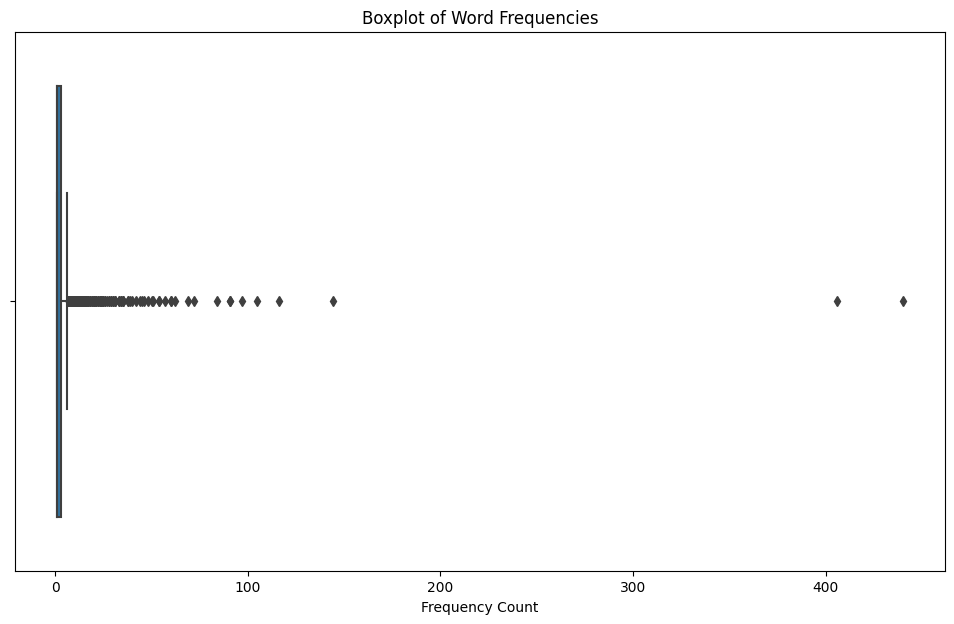

In [11]:
!pip install seaborn

import seaborn as sns

# Convert word_counts to a list of frequencies
frequencies = list(word_counts.values())

freq_df = pd.DataFrame(frequencies, columns=['Frequency'])

# Create a DataFrame from the frequencies; this is needed for the boxplot
freq_df = pd.DataFrame(frequencies, columns=['Frequency'])

# Create a boxplot with Seaborn
plt.figure(figsize=(12, 7))
sns.boxplot(x=freq_df['Frequency'])
plt.title('Boxplot of Word Frequencies')
plt.xlabel('Frequency Count')  # Since we have only one column, this label is for the x-axis.

# Show the plot
plt.show()